In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns

In [99]:
df = pd.read_csv('/Users/Owner/Desktop/train.csv', sep=";")

In [100]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [101]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [102]:
# Step 4: Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)




Missing values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [103]:
# Check the value counts for each categorical column
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value counts for default:
default
no     44396
yes      815
Name: count, dtype: int64

Value counts for housing:
housing
yes    25130
no     20081
Name: count, dtype: int64

Value counts for loan:
loan
no     37967
yes     7244
Name: count, dtype: int64

Value counts for contact:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Value counts for month:
month
may    13766
jul     68

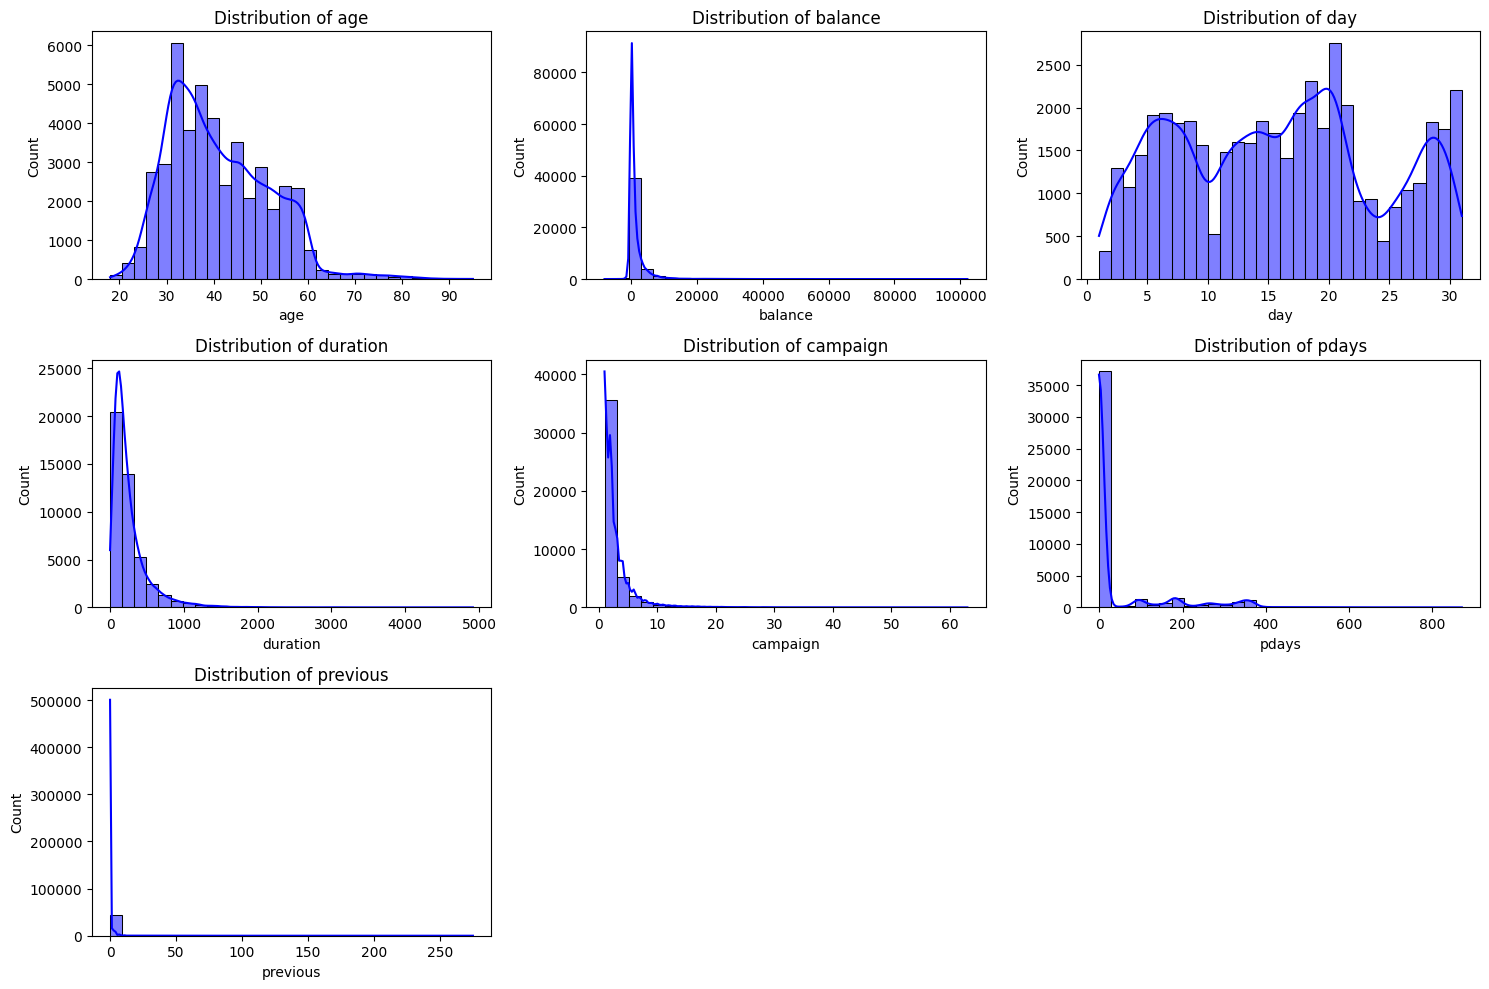

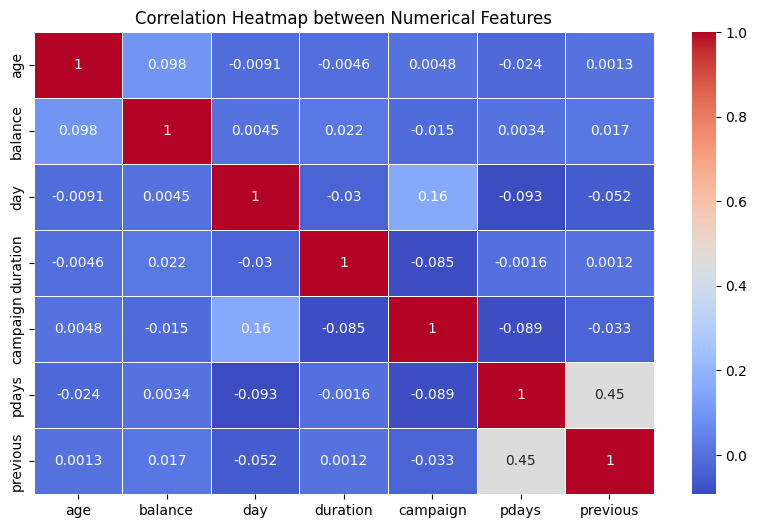

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [104]:
# Import necessary library for visualization
import matplotlib.pyplot as plt

# List of numerical columns for easy access
numerical_columns = ['age', 'balance', 'day','duration', 'campaign', 'pdays', 'previous']


# Visualize the distribution of numerical variables
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Check correlations between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Numerical Features')
plt.show()

# Summary statistics of numerical columns
df[numerical_columns].describe()


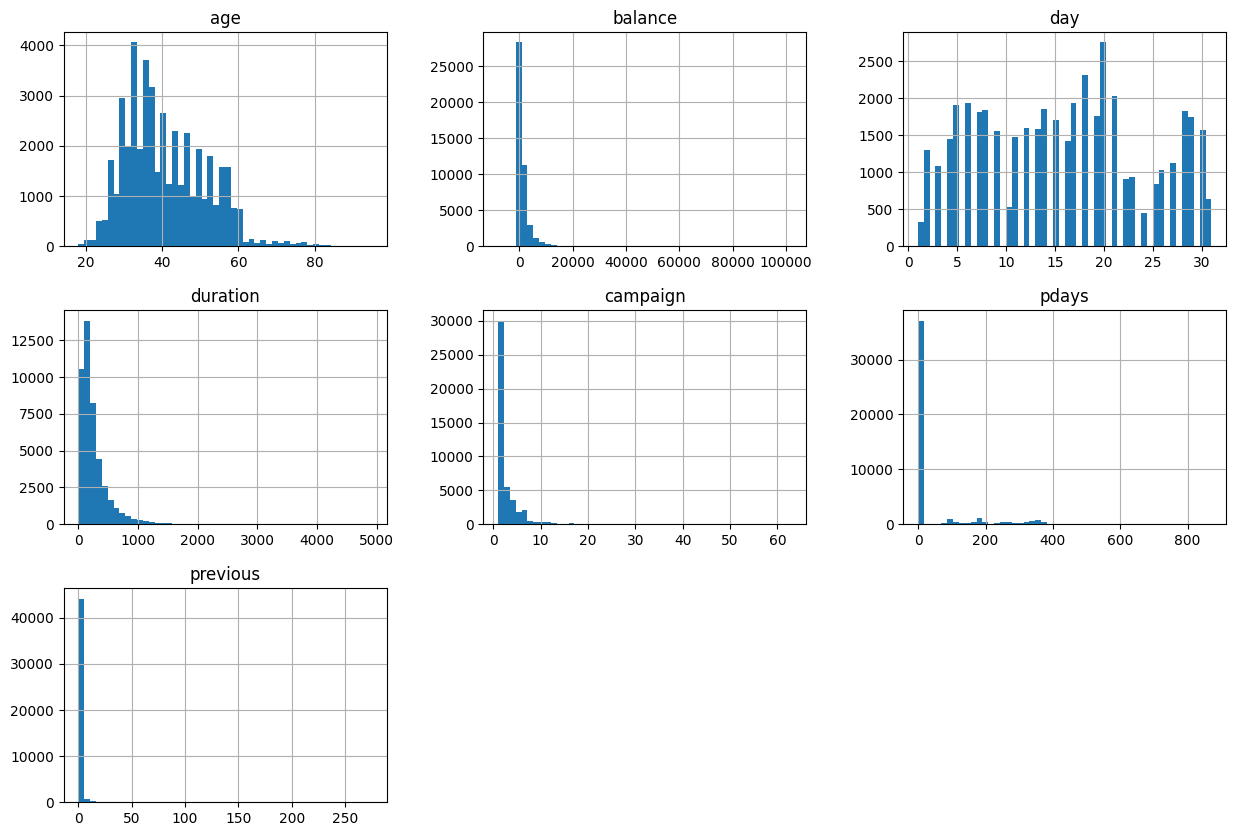

In [105]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

df[numerical_columns].hist(bins=50, figsize=(15, 10))
plt.show()


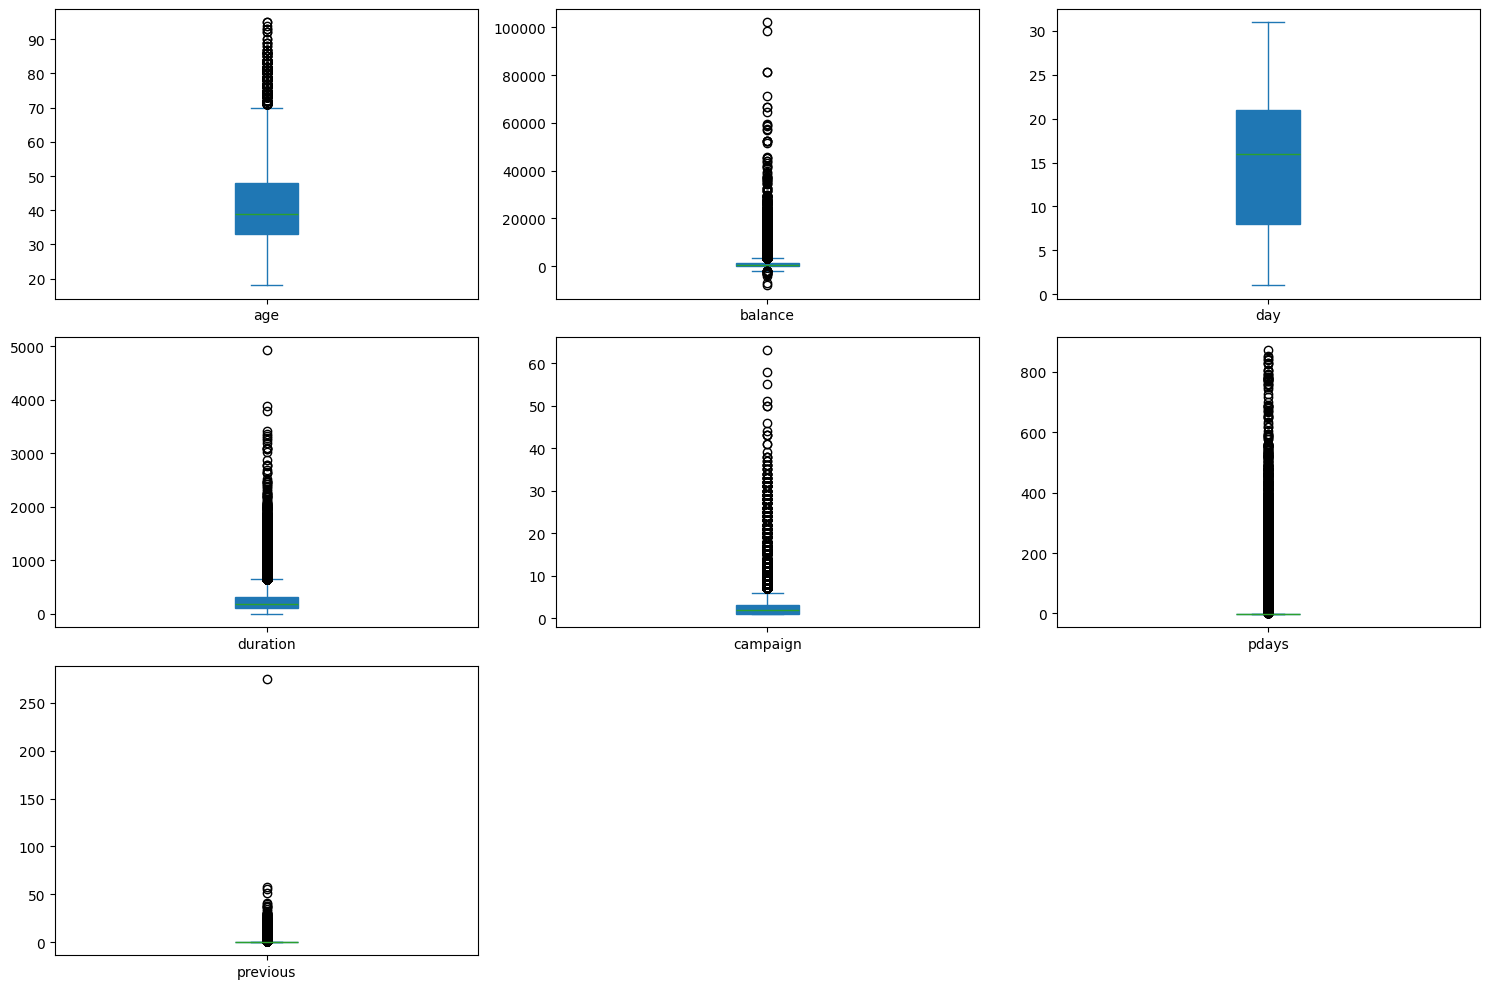

In [106]:
import matplotlib.pyplot as plt

# List of numerical variables of interest
numerical_columns = ['age', 'balance', 'day','duration', 'campaign', 'pdays', 'previous']

# Create boxplots for each specified variable
df[numerical_columns].plot(kind="box", subplots=True, layout=(3, 3), figsize=(15, 10), patch_artist=True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

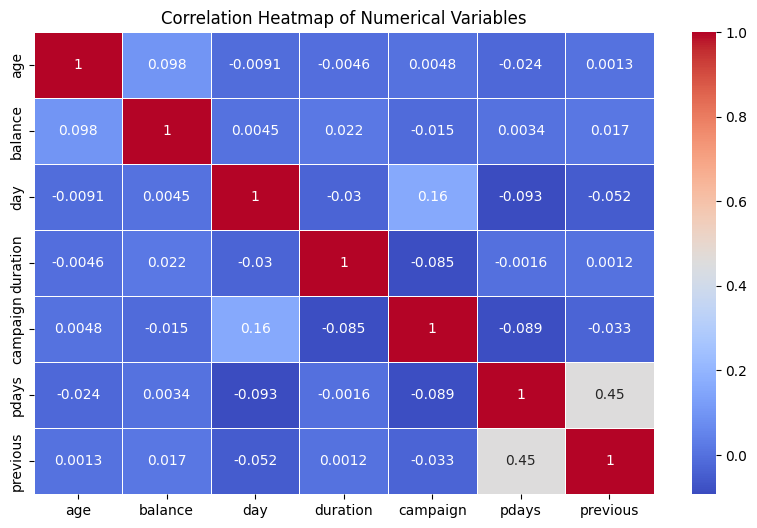

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns from the dataset
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Calculate the correlation matrix for the numerical variables
correlation_matrix = df[numerical_columns].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_3082/91156769.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df, palette='Set3')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_3082/91156769.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df, palette='Set3')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_3082/91156769.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df, palette='Set3')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipy

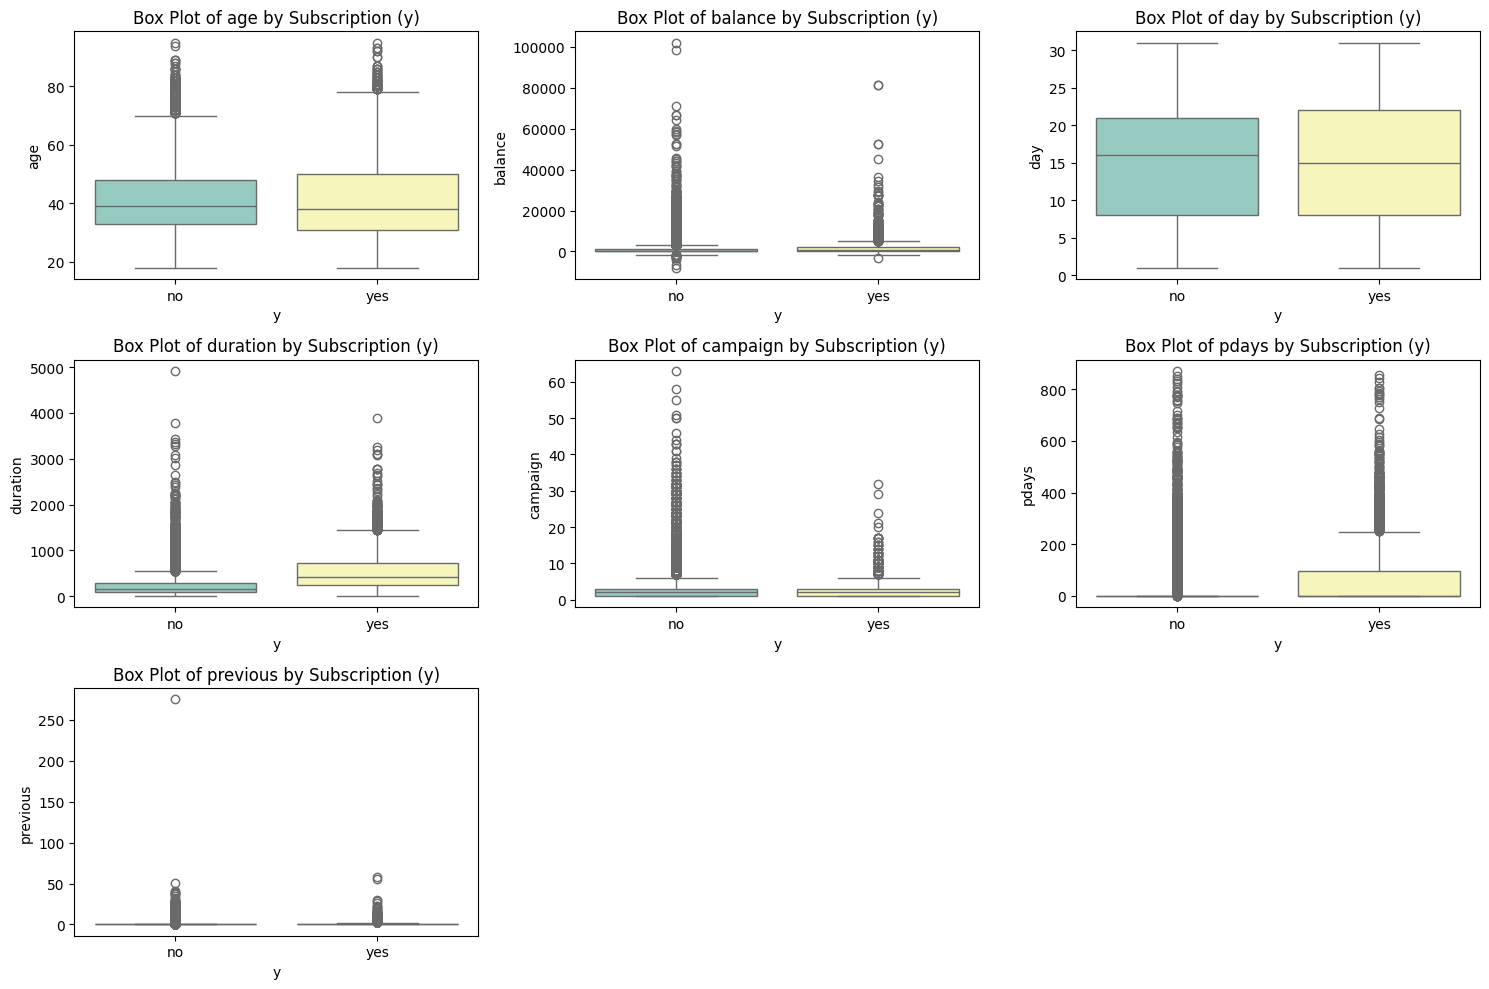

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical variables of interest
numerical_columns = ['age', 'balance', 'day','duration', 'campaign', 'pdays', 'previous']

# Create boxplots for each numerical variable grouped by 'y'
plt.figure(figsize=(15, 10))  # Adjust figure size
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Create a 2x3 grid of plots
    sns.boxplot(x='y', y=col, data=df, palette='Set3')
    plt.title(f'Box Plot of {col} by Subscription (y)')
    plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


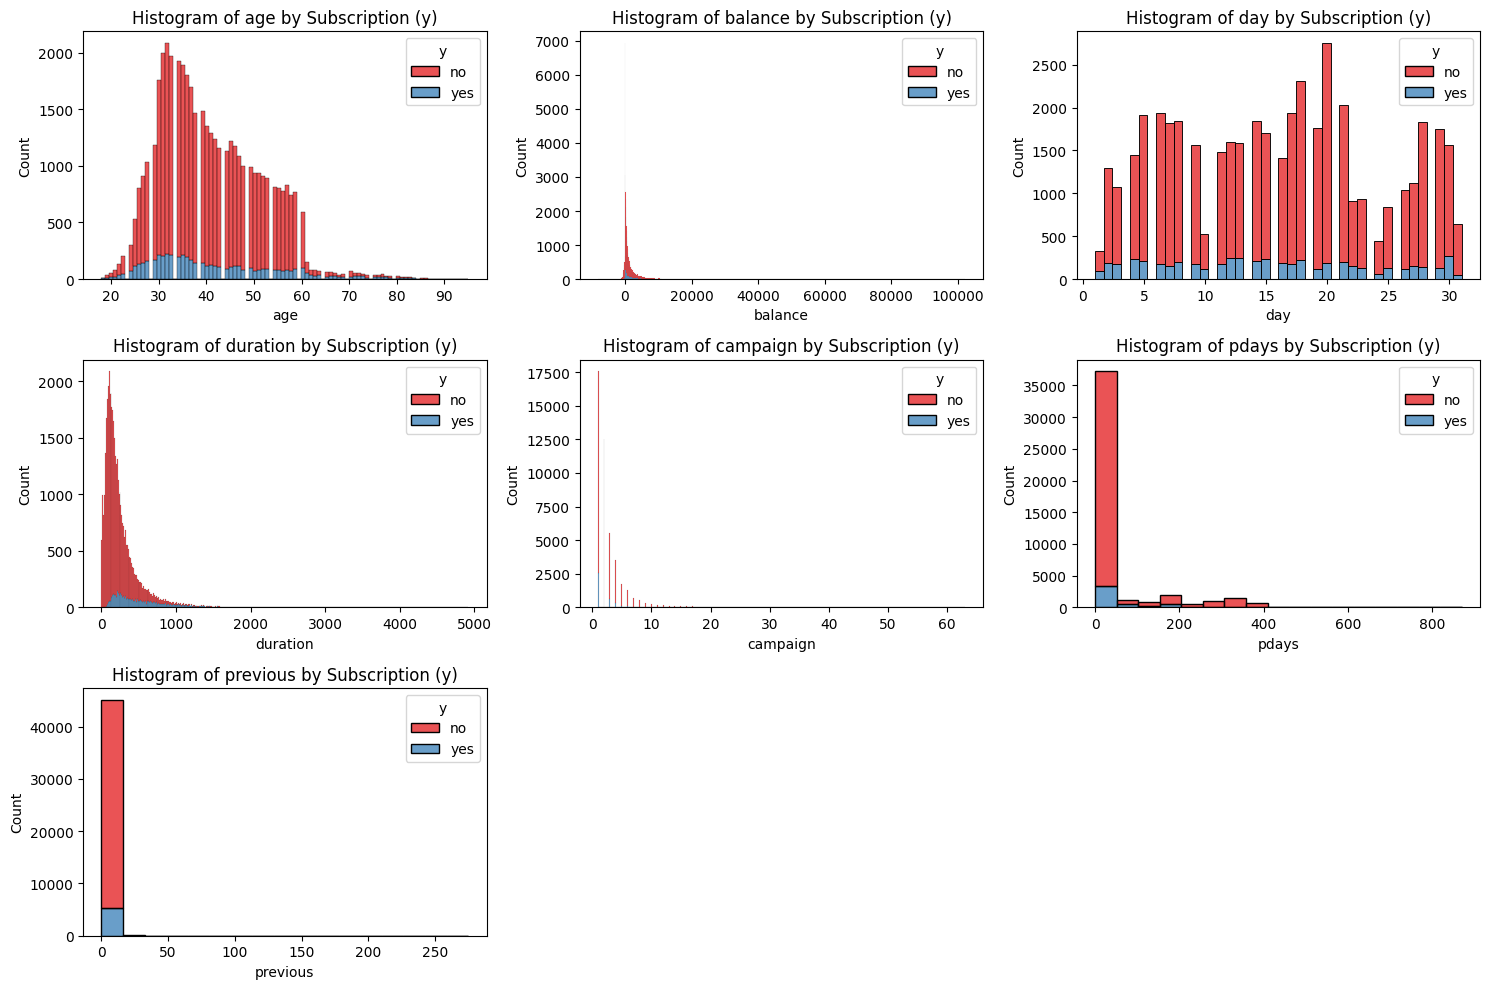

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical variables of interest
numerical_columns = ['age', 'balance', 'day','duration', 'campaign', 'pdays', 'previous']

# Create histograms for each numerical variable grouped by 'y'
plt.figure(figsize=(15, 10))  # Adjust figure size
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Create a 2x3 grid of plots
    sns.histplot(data=df, x=col, hue='y', multiple='stack', kde=False, palette='Set1')
    plt.title(f'Histogram of {col} by Subscription (y)')
    plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


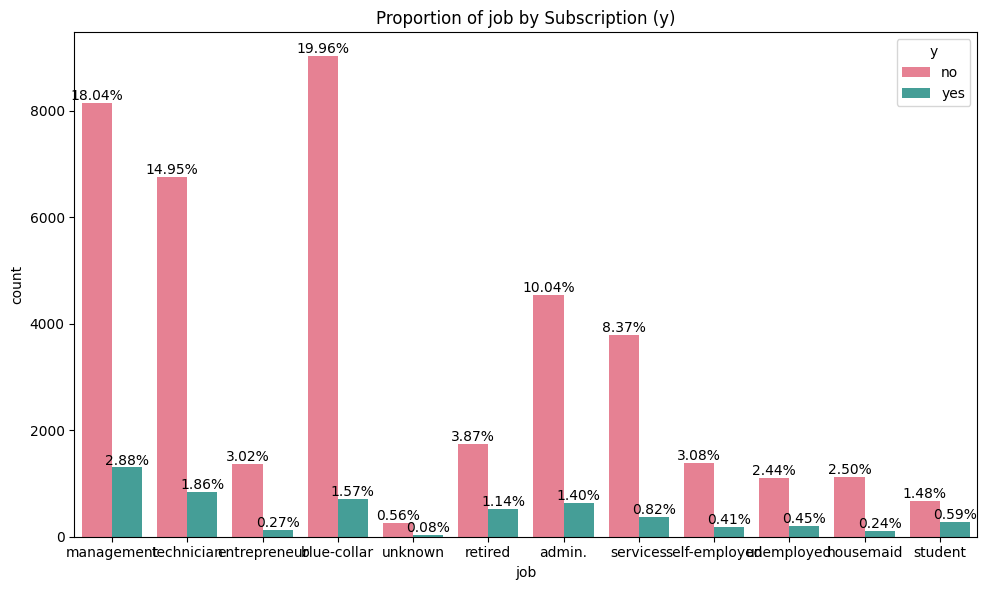

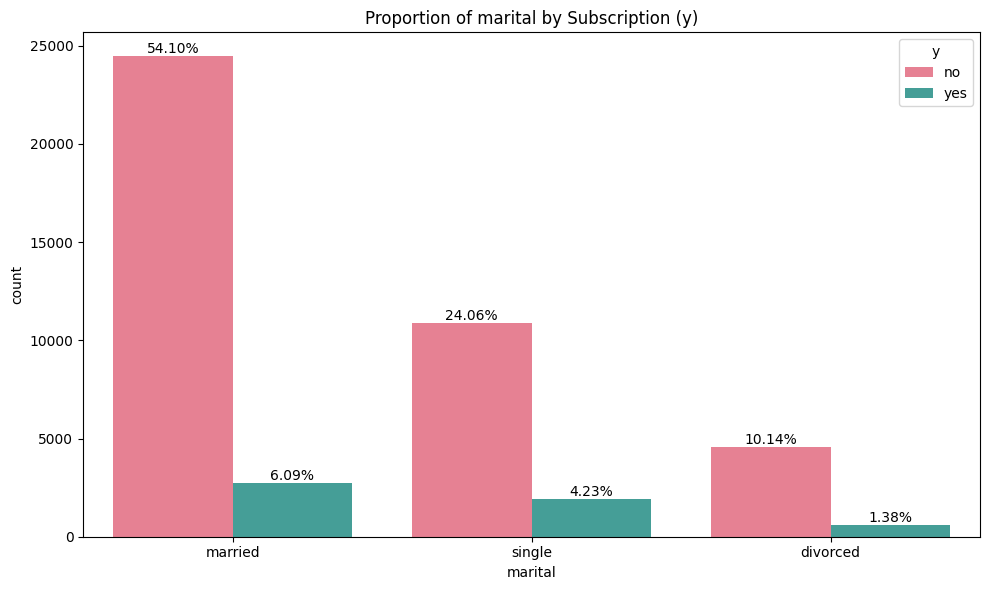

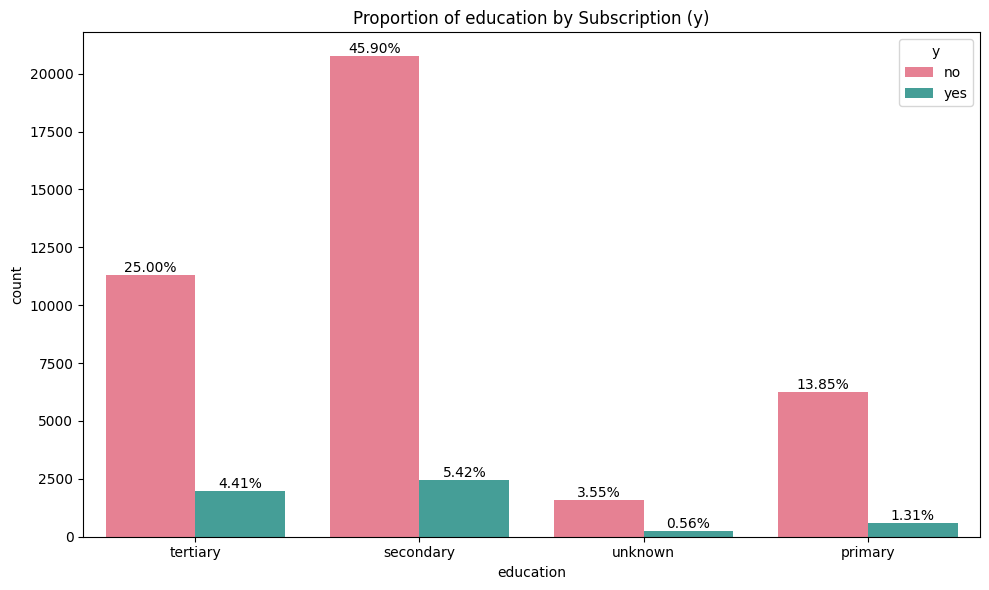

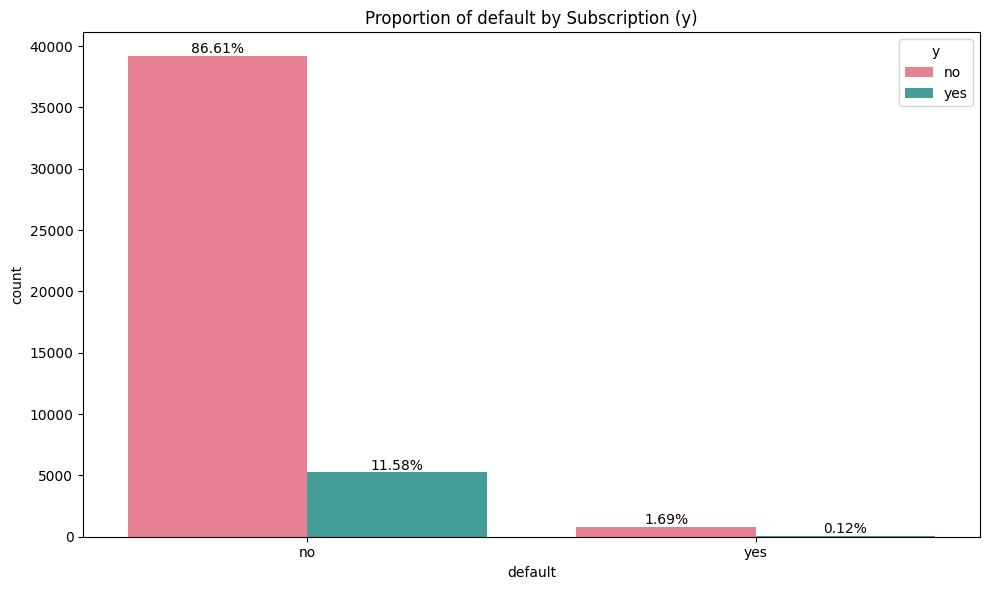

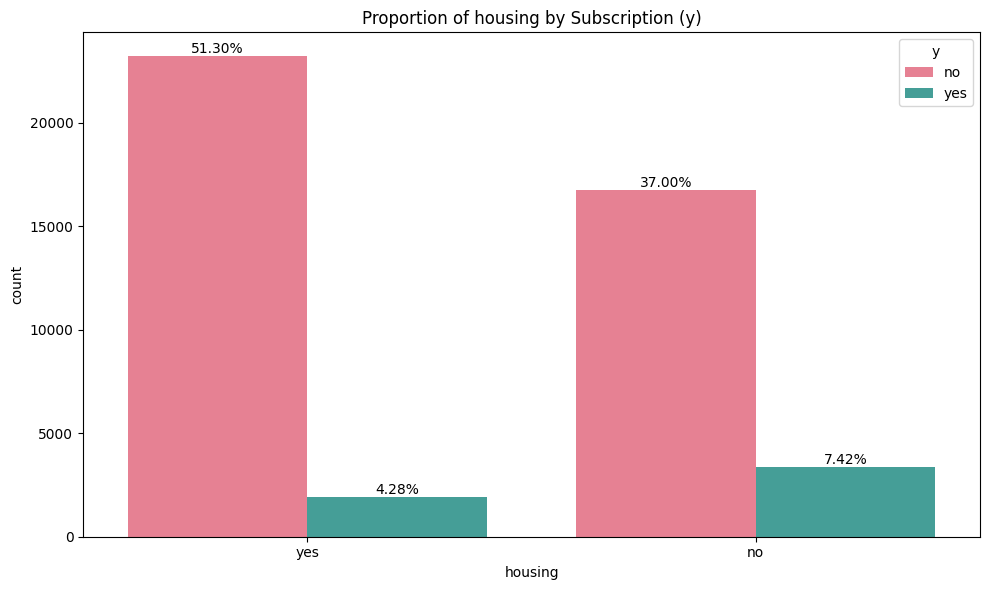

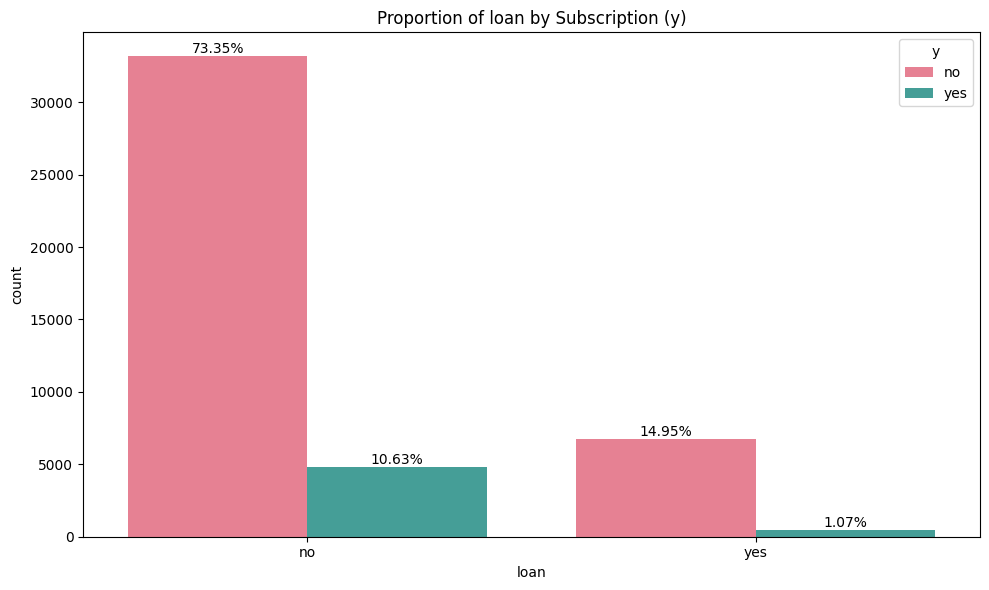

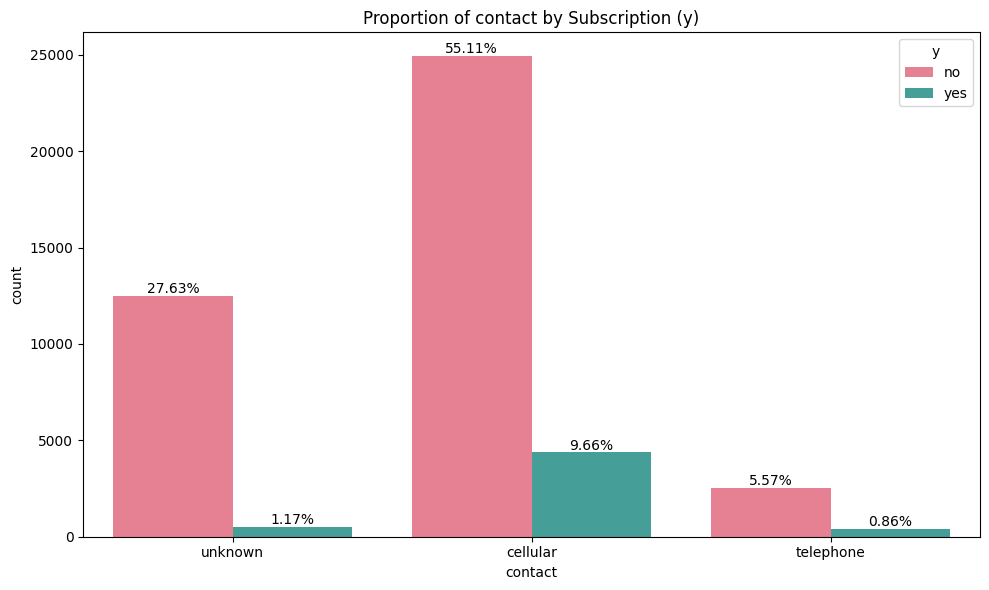

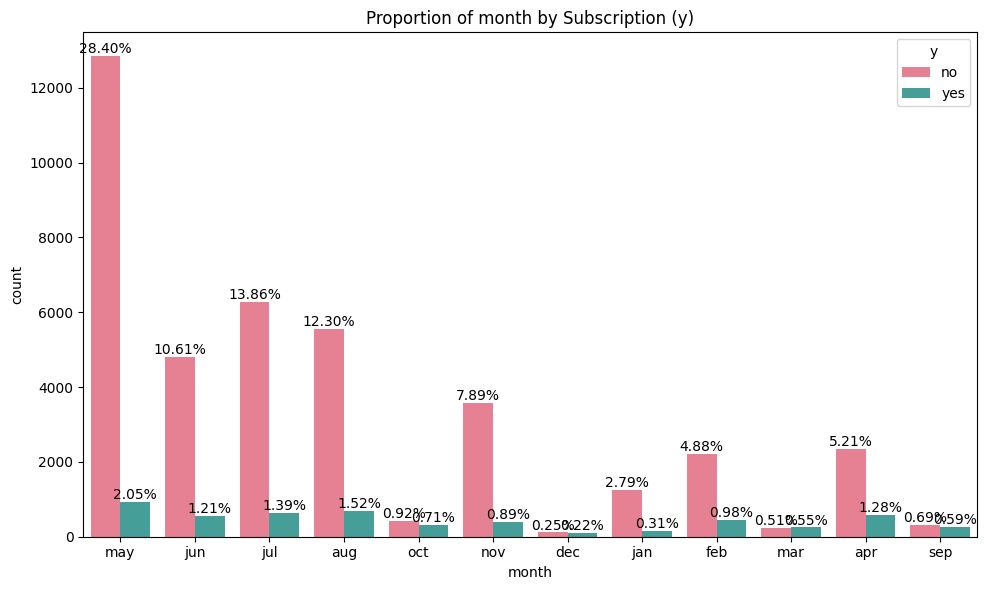

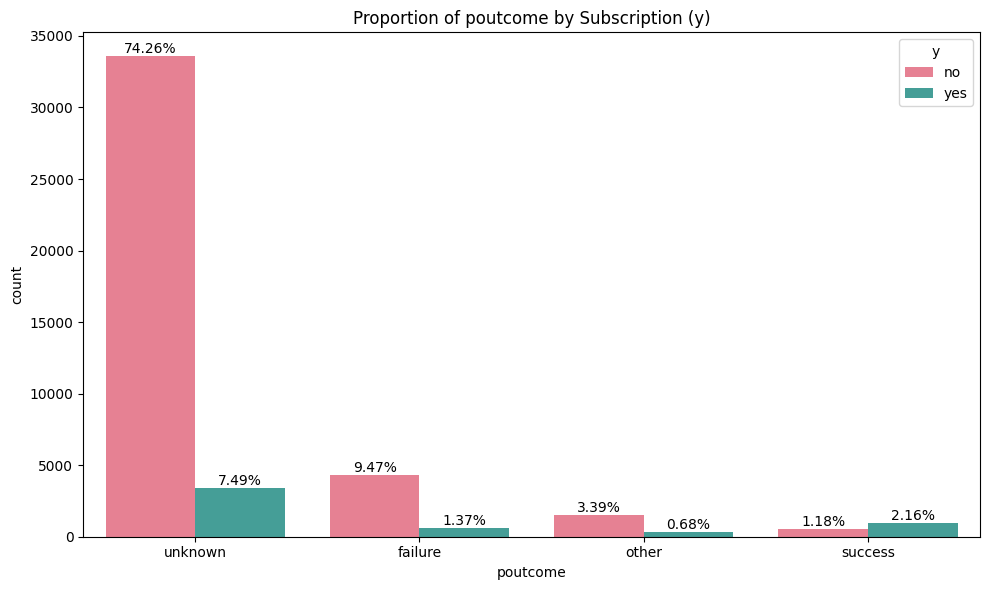

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Plot proportions for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    plot = sns.countplot(data=df, x=col, hue='y', palette='husl')  # Create a count plot with hue based on 'y'
    
    # Annotate each bar with the percentage
    for p in plot.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars with height greater than 0
            total = len(df)
            percentage = (height / total) * 100
            plot.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Proportion of {col} by Subscription (y)')
    plt.tight_layout()
    plt.show()



/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_3082/1244309928.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_3082/1244309928.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_3082/1244309928.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=

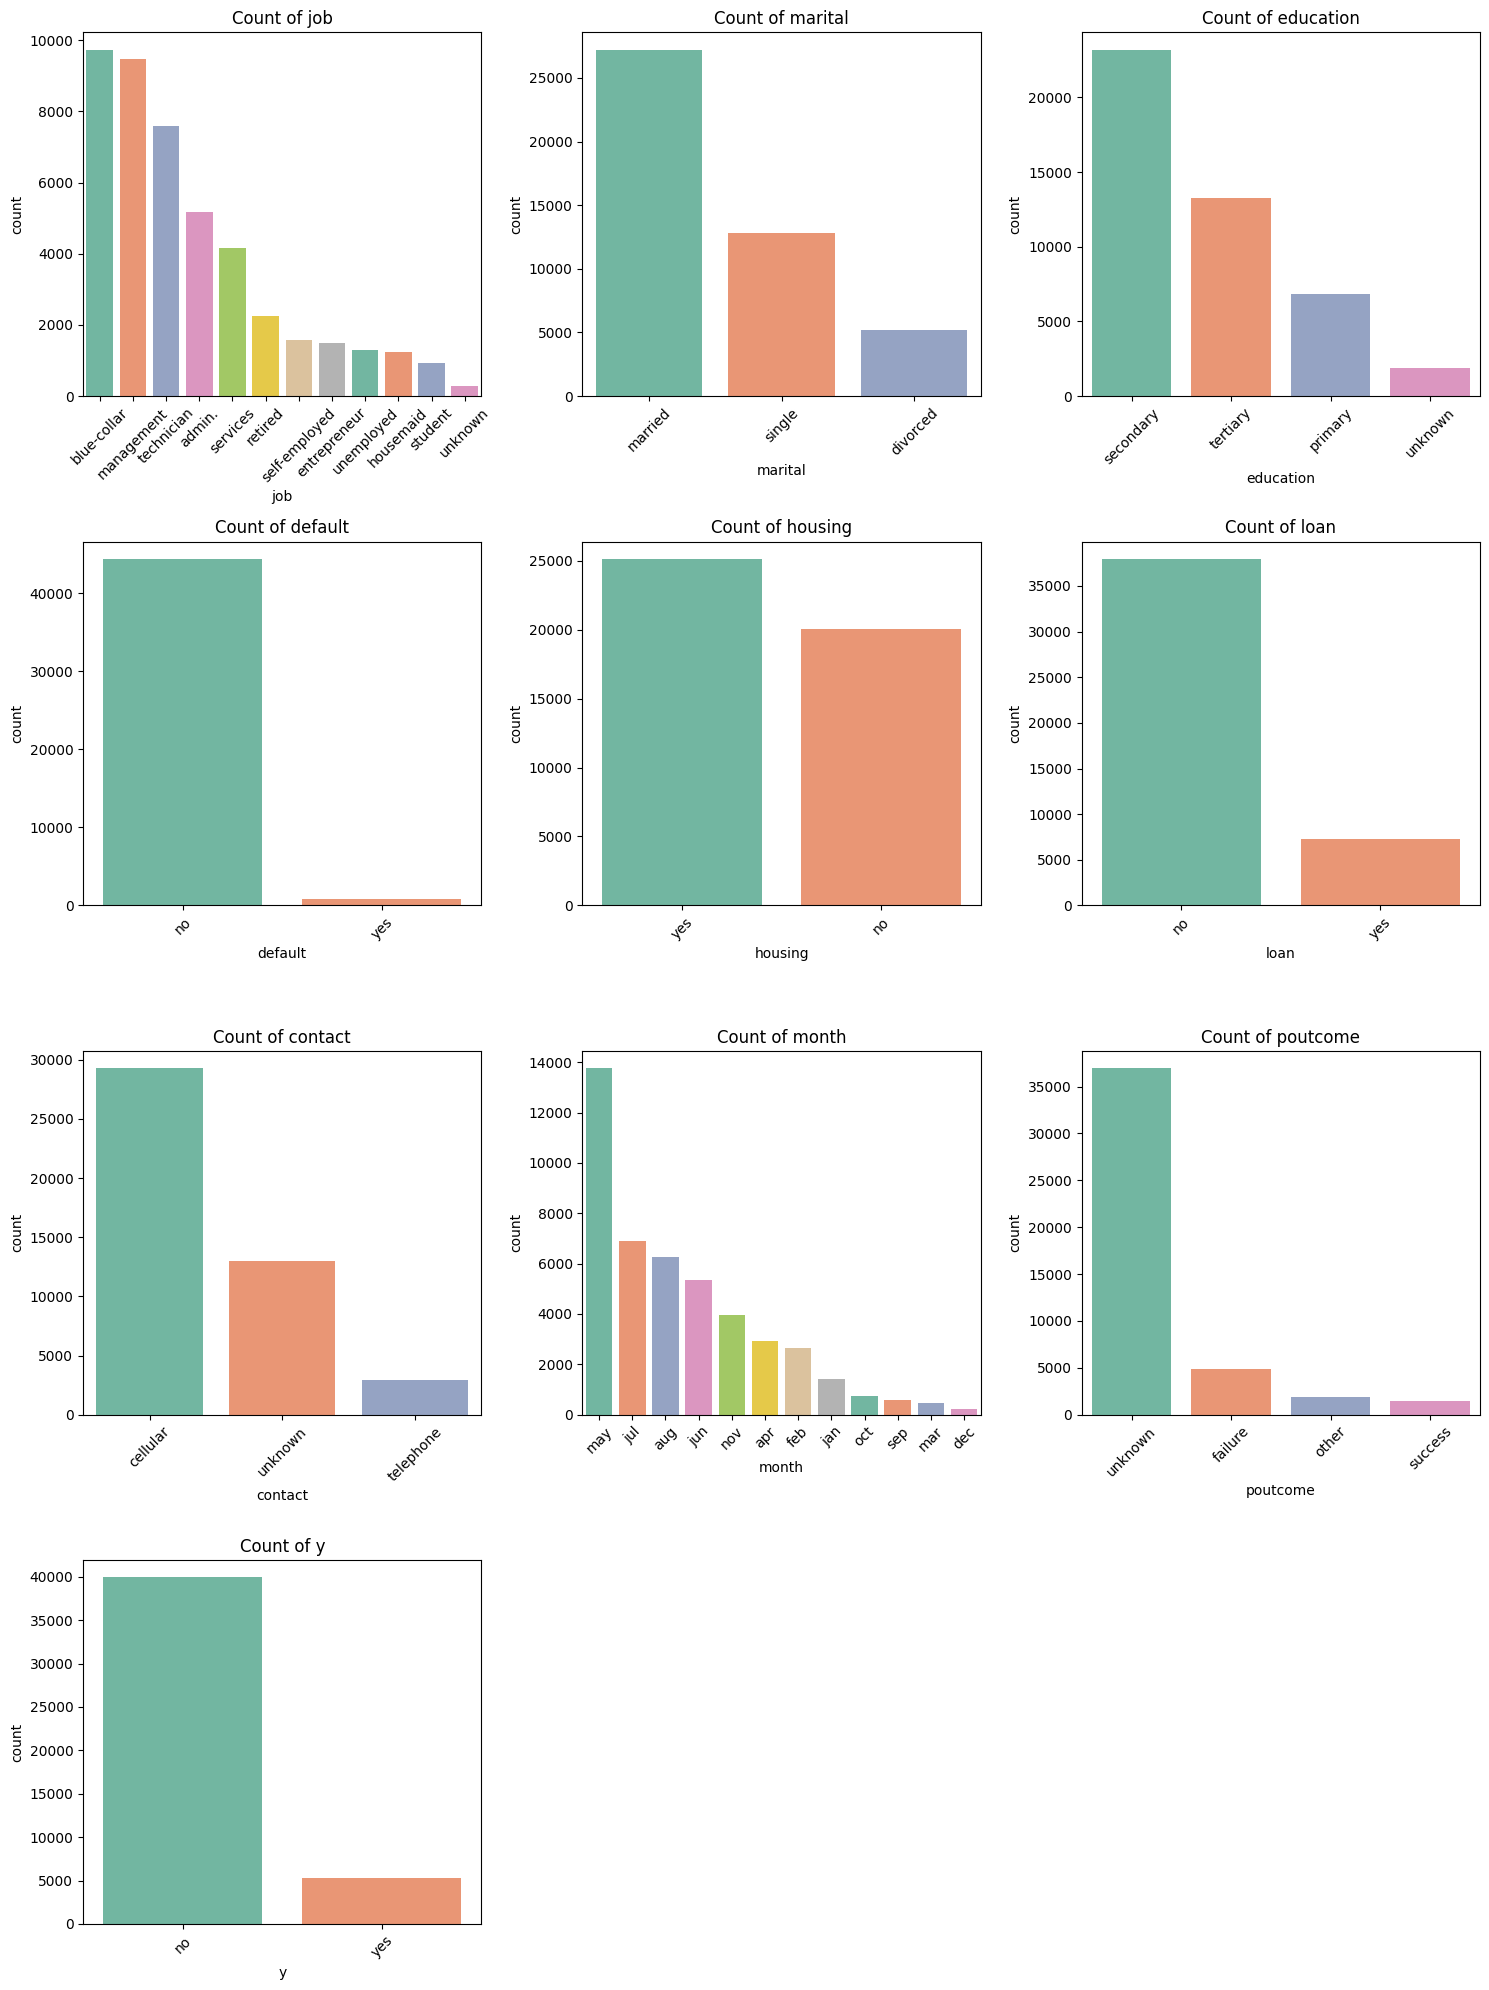

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [111]:
# List of categorical columns for easy access
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Plot the count of each category in categorical columns
plt.figure(figsize=(15, 20))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()

# Checking the balance of the target variable 'y'
df['y'].value_counts(normalize=True)


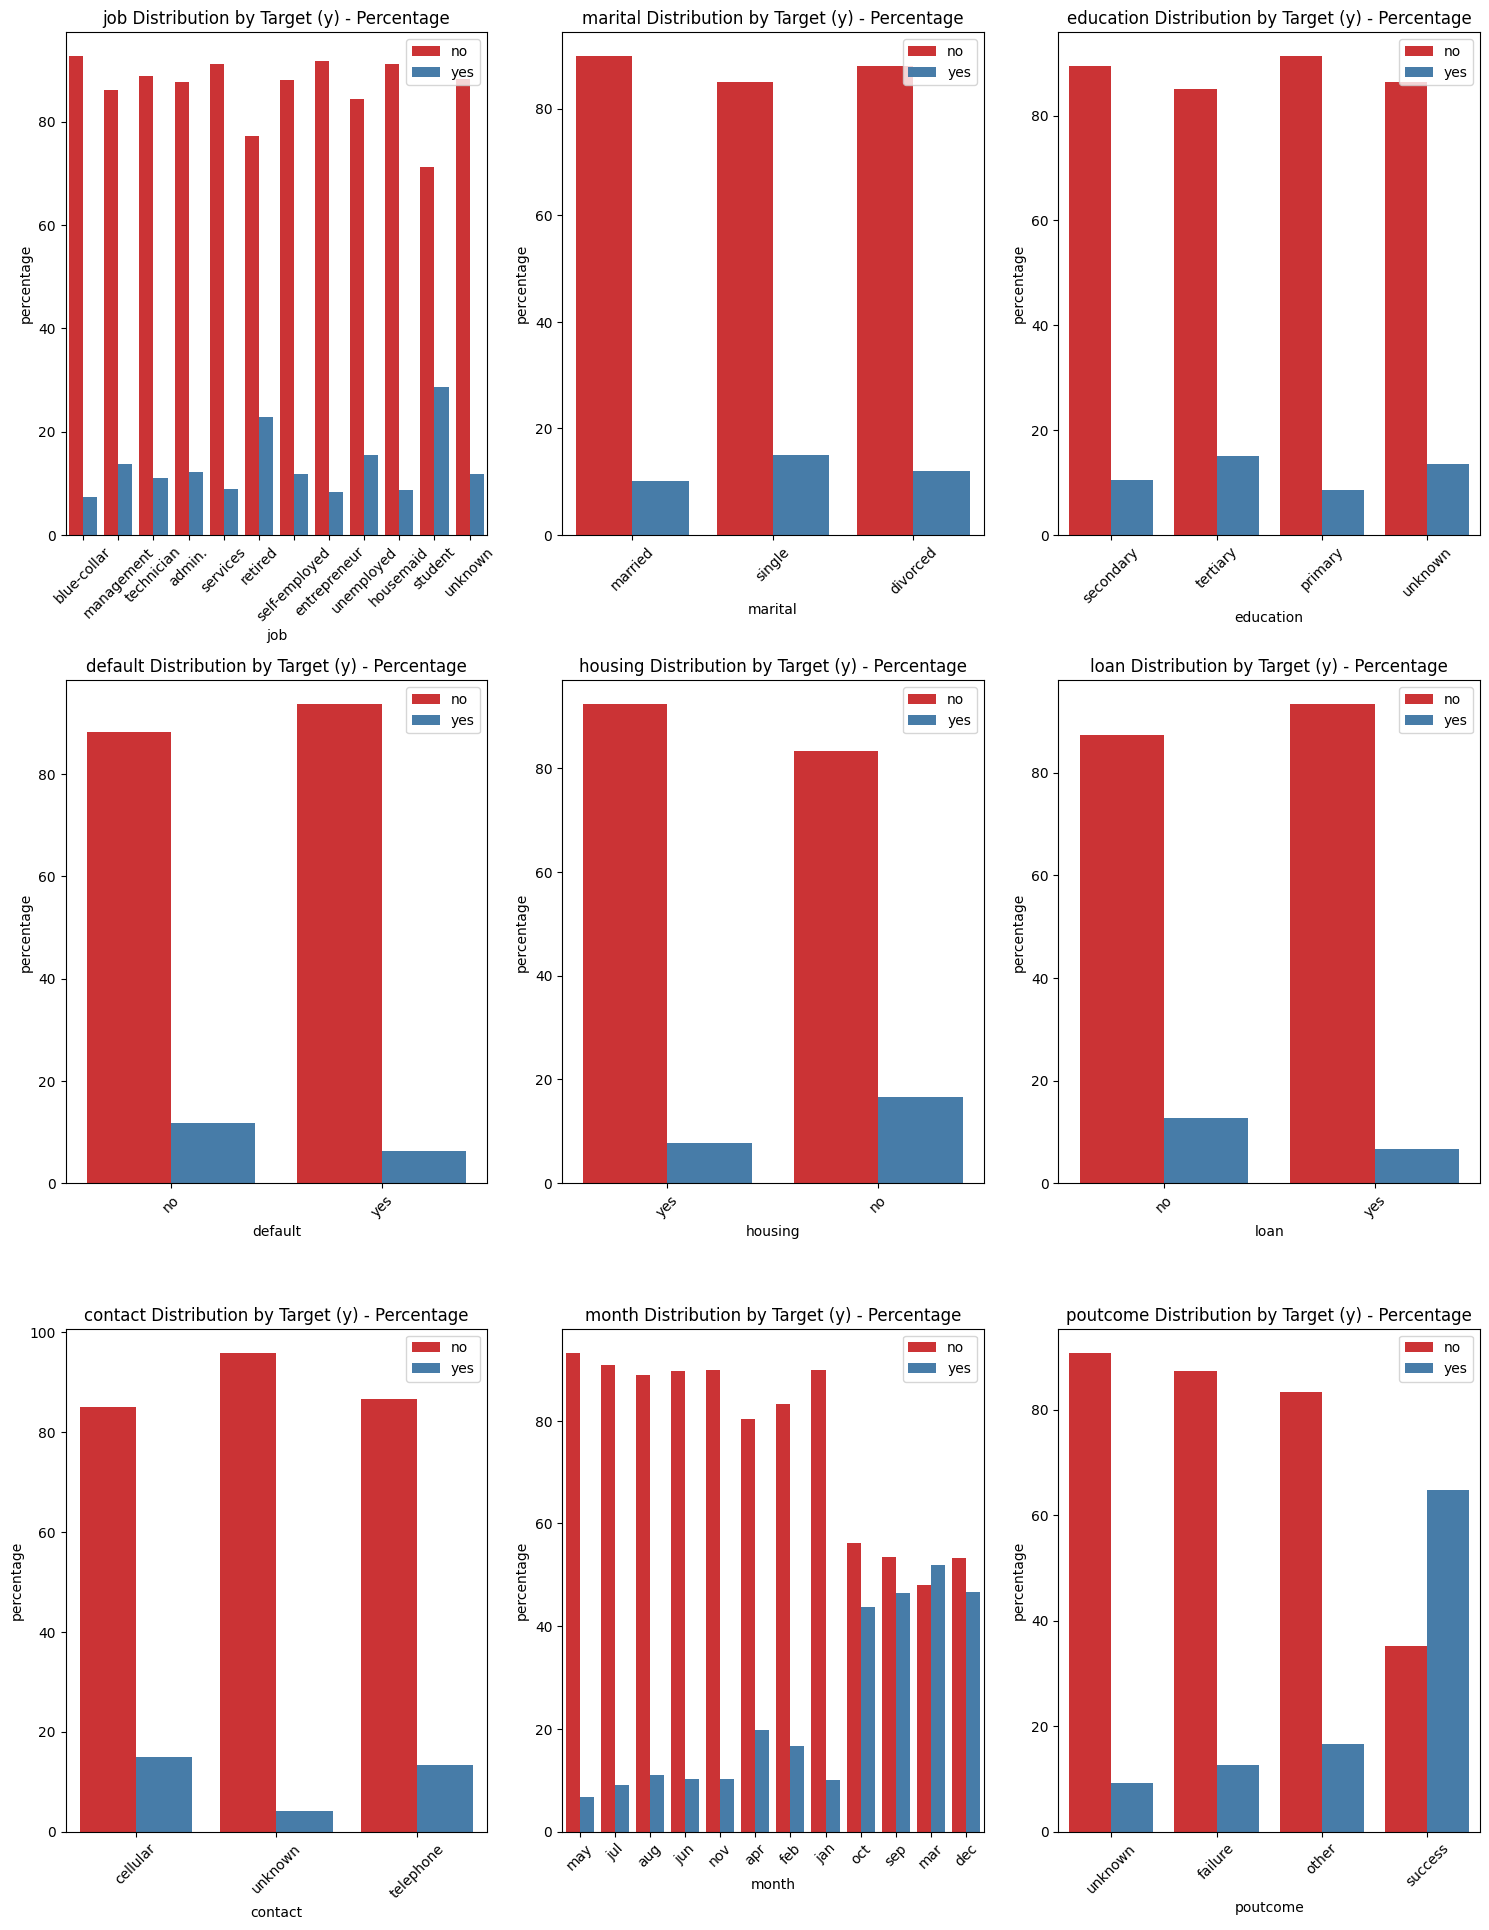

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns for easy access (excluding 'y' since it's the target)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create a figure to plot the proportions
plt.figure(figsize=(15, 25))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    
    # Calculate the percentage for each category split by 'y'
    category_counts = df.groupby([col, 'y']).size().unstack(fill_value=0)
    category_percentage = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
    
    # Convert the dataframe back to a long format for seaborn
    category_percentage = category_percentage.reset_index().melt(id_vars=col, value_vars=['no', 'yes'], var_name='y', value_name='percentage')
    
    # Plot the normalized counts as percentages
    sns.barplot(data=category_percentage, x=col, y='percentage', hue='y', palette='Set1', order=df[col].value_counts().index)
    
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution by Target (y) - Percentage')
    
    # Move the legend to the upper right corner of each subplot
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [113]:
### Modelling


In [114]:
# Necessary imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Split data into X variables and y variable
X = df.drop(columns=['y'])  # 'y' is the target variable
y = df['y']  # Target variable (whether a client subscribed or not)

# Split the data into training and test sets (30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [115]:
from sklearn.preprocessing import OneHotEncoder

# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Initialize OneHotEncoder with the correct argument
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns in the dataset
encoded_data = ohe.fit_transform(df[categorical_columns])

# Display the encoded data
print("Encoded Data:")
print(encoded_data)

# Get the feature names for the encoded variables
print("Feature Names:", ohe.get_feature_names_out(categorical_columns))



Encoded Data:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]]
Feature Names: ['job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_divorced' 'marital_married' 'marital_single' 'education_primary'
 'education_secondary' 'education_tertiary' 'education_unknown'
 'default_no' 'default_yes' 'housing_no' 'housing_yes' 'loan_no'
 'loan_yes' 'contact_cellular' 'contact_telephone' 'contact_unknown'
 'month_apr' 'month_aug' 'month_dec' 'month_feb' 'month_jan' 'month_jul'
 'month_jun' 'month_mar' 'month_may' 'month_nov' 'month_oct' 'month_sep'
 'poutcome_failure' 'poutcome_other' 'poutcome_success' 'poutcome_unknown']


In [116]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns from your dataset
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns using MinMaxScaler
scaled_data = scaler.fit_transform(df[numeric_columns])

# Display the scaled data
print("Scaled Data:")
print(scaled_data)


Scaled Data:
[[0.51948052 0.09225936 0.13333333 ... 0.         0.         0.        ]
 [0.33766234 0.07306666 0.13333333 ... 0.         0.         0.        ]
 [0.19480519 0.07282153 0.13333333 ... 0.         0.         0.        ]
 ...
 [0.7012987  0.12468905 0.53333333 ... 0.06451613 0.21215596 0.01090909]
 [0.50649351 0.07886805 0.53333333 ... 0.0483871  0.         0.        ]
 [0.24675325 0.09977666 0.53333333 ... 0.01612903 0.21674312 0.04      ]]


In [117]:
# Define numerical and categorical columns
numeric_columns = ['age', 'balance', 'day','duration', 'campaign', 'pdays', 'previous']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create the preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_columns),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One Hot Encode categorical features
    ]
)




In [118]:
# Define models to be tested in the pipeline
knn = KNeighborsClassifier()
logreg = LogisticRegression()

# Define a pipeline for each model (knn and logistic regression)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])


In [119]:
# Train the k-NN model using the pipeline
knn_pipeline.fit(X_train, y_train)

# Train the logistic regression model using the pipeline
logreg_pipeline.fit(X_train, y_train)

# Evaluate both models
print("k-NN Model Performance:")
y_pred_knn = knn_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_knn))

print("Logistic Regression Model Performance:")
y_pred_logreg = logreg_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_logreg))


k-NN Model Performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     11966
         yes       0.58      0.25      0.35      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564

Logistic Regression Model Performance:
              precision    recall  f1-score   support

          no       0.92      0.98      0.94     11966
         yes       0.64      0.32      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



In [120]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
import numpy as np

# Define scoring functions, setting pos_label='yes' for the binary classification problem
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, pos_label='yes'),
    'precision': make_scorer(precision_score, pos_label='yes'),
    'f1': make_scorer(f1_score, pos_label='yes')
}



In [121]:
from sklearn.model_selection import StratifiedKFold

# Use StratifiedKFold to ensure balanced distribution of the target classes across folds
stratified_kfold = StratifiedKFold(n_splits=5)


In [122]:
# Cross-validation evaluation for KNN model pipeline
knn_scores = cross_validate(knn_pipeline, X_train, y_train, scoring=scoring, cv=stratified_kfold)


In [123]:
# Extracting the mean scores for KNN
knn_accuracy = np.mean(knn_scores['test_accuracy'])
knn_recall = np.mean(knn_scores['test_recall'])
knn_precision = np.mean(knn_scores['test_precision'])
knn_f1 = np.mean(knn_scores['test_f1'])


In [124]:
# Cross-validation evaluation for Logistic Regression model pipeline
logreg_scores = cross_validate(logreg_pipeline, X_train, y_train, scoring=scoring, cv=stratified_kfold)


In [125]:
# Extracting the mean scores for Logistic Regression
logreg_accuracy = np.mean(logreg_scores['test_accuracy'])
logreg_recall = np.mean(logreg_scores['test_recall'])
logreg_precision = np.mean(logreg_scores['test_precision'])
logreg_f1 = np.mean(logreg_scores['test_f1'])


In [126]:
# Print out the mean scores
print(f"KNN Mean Accuracy: {knn_accuracy}")
print(f"KNN Mean Recall: {knn_recall}")
print(f"KNN Mean Precision: {knn_precision}")
print(f"KNN Mean F1 Score: {knn_f1}")

print(f"Logistic Regression Mean Accuracy: {logreg_accuracy}")
print(f"Logistic Regression Mean Recall: {logreg_recall}")
print(f"Logistic Regression Mean Precision: {logreg_precision}")
print(f"Logistic Regression Mean F1 Score: {logreg_f1}")


KNN Mean Accuracy: 0.8891837892576537
KNN Mean Recall: 0.23056353161637166
KNN Mean Precision: 0.5603458655401607
KNN Mean F1 Score: 0.32662801486723386
Logistic Regression Mean Accuracy: 0.9015389077635311
Logistic Regression Mean Recall: 0.31481640391505405
Logistic Regression Mean Precision: 0.6645210262361612
Logistic Regression Mean F1 Score: 0.4271803399522961


In [127]:
### KNN

In [129]:
# Ensure OneHotEncoder and scaling are applied correctly using a pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Define the pipeline, ensuring that the preprocessor is used before the classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing (OHE + scaling)
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # k-NN classifier
])

# Train the pipeline (preprocessing + k-NN model)
knn_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_pipeline.predict(X_test)


In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [132]:
# Create a pipeline with a preprocessor and KNN model
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Define hyperparameter grid
param_grid = {
    'classifier__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for KNN:", grid_search.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/Users/owner/Library/Python/3.9/lib/python/site-

Best hyperparameters for KNN: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}


In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline

# Build the final KNN classifier using the best hyperparameters
final_classifier = KNeighborsClassifier(
    n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
    metric=grid_search.best_params_['classifier__metric'],
    weights=grid_search.best_params_['classifier__weights']
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor handles the scaling and encoding
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)

# Specify pos_label='yes' since 'yes' is the positive class in the target variable 'y'
test_f1 = f1_score(y_test, pred, pos_label='yes')
test_precision = precision_score(y_test, pred, pos_label='yes')
test_recall = recall_score(y_test, pred, pos_label='yes')

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")


Final Model Test Accuracy: 0.8905190209377765
Final Model Test F1 Score: 0.3495400788436268
Final Model Test Precision: 0.5824817518248175
Final Model Test Recall: 0.24968710888610762


In [136]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

ValueError: y_true takes value in {'no', 'yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [ ]:
### Logistic 